In [37]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
df = pd.read_csv('ETH_HUNT_transactions.csv')

In [188]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])
df['date_only'] = df['block_timestamp'].dt.date

In [189]:
wa = df[['trx_initiator', 'date_only']]

In [190]:
wa.drop_duplicates(subset=['date_only', 'trx_initiator'], keep='first', inplace=True)

In [191]:
b = []
waste = []

for i in wa['trx_initiator']:
    if i not in waste:
        b.append(1)
        waste.append(i)
    else:
        b.append(0)

In [192]:
result = []

for i in range(len(b)):
    if i == 0:
        result.append(b[i])
    else:
        result.append(b[i] + result[i-1])

In [193]:
wa['unique_wallets'] = result

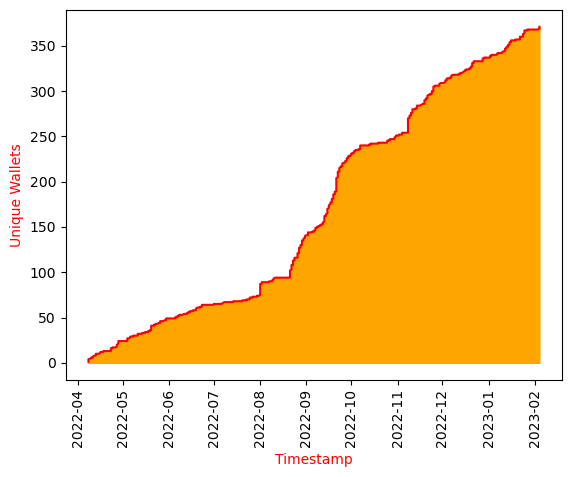

In [194]:
x = wa['date_only']
y = wa['unique_wallets']

plt.fill_between(x, y, color='orange')
plt.plot(x, y, color = 'r')
plt.xlabel('Timestamp', color = 'r')
plt.ylabel('Unique Wallets', color = 'r')
plt.xticks(rotation=90)
plt.show()